In [4]:
import requests as req

In [5]:
res = req.get('http://naver.com')
res

<Response [200]>

'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버
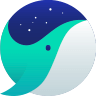
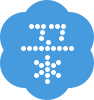

In [6]:
res.text

In [7]:
#서버를 찾을 수 없음-클라이언트 에러
res2 = req.get('https://www.melon.com/')
res2

<Response [406]>

In [8]:
#위의 문제를 해결하기 위해 header 지정?
header = {'User-Agent' : 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36 Edg/105.0.1343.33'}

In [9]:
res2 = req.get('https://www.melon.com/', headers=header)
res2

<Response [200]>

In [10]:
!pip install bs4

In [11]:
from bs4 import BeautifulSoup as bs

#객체화
soup = bs(res.text, "html.parser")

soup.select("tag_name")
soup

soup.select("tag_name.class_name")

#특정태그1
soup.select('tag > child_tag')

#특정태그2
soup.select('tag.class_name > child_tag')

In [12]:
res3 = req.get('http://naver.com')
res3

<Response [200]>


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
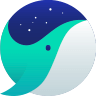
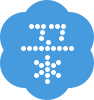

In [13]:
#객체화
soup = bs(res3.text, 'html.parser')
soup

In [14]:
naver = soup.select("a.nav")
naver

[<a class="nav" data-clk="svc.mail" href="https://mail.naver.com/"><i class="ico_mail"></i>메일</a>,
 <a class="nav" data-clk="svc.cafe" href="https://section.cafe.naver.com/">카페</a>,
 <a class="nav" data-clk="svc.blog" href="https://section.blog.naver.com/">블로그</a>,
 <a class="nav" data-clk="svc.kin" href="https://kin.naver.com/">지식iN</a>,
 <a class="nav shop" data-clk="svc.shopping" href="https://shopping.naver.com/"><span class="blind">쇼핑</span></a>,
 <a class="nav shoplive" data-clk="svc.shoppinglive" href="https://shoppinglive.naver.com/home"><span class="blind">쇼핑LIVE</span></a>,
 <a class="nav" data-clk="svc.pay" href="https://order.pay.naver.com/home">Pay</a>,
 <a class="nav" data-clk="svc.tvcast" href="https://tv.naver.com/"><i class="ico_tv"></i>TV</a>,
 <a class="nav" data-clk="svc.dic" href="https://dict.naver.com/">사전</a>,
 <a class="nav" data-clk="svc.news" href="https://news.naver.com/">뉴스</a>,
 <a class="nav" data-clk="svc.stock" href="https://finance.naver.com/">증권</a>,


In [15]:
len(naver)

16

In [16]:
#메일이라는 컨텐츠만 뽑아오고 싶을 때!
#네이버 타입: 리스트
#인덱싱을 통해 하나의 스트링만 선택
naver[0].text

'메일'

In [17]:
naver[1].text

'카페'

In [18]:
#for문을 이용하여 모든 컨텐츠 출력해보기!
for i in naver:
    print(i.text)


메일
카페
블로그
지식iN
쇼핑
쇼핑LIVE
Pay
TV
사전
뉴스
증권
부동산
지도
VIBE
도서
웹툰


In [19]:
#네이버 코스피, 거래상위
re4=req.get('https://finance.naver.com/sise/sise_quant.naver')
re4

<Response [200]>

In [20]:
soup2 = bs(re4.text, 'html.parser')
soup2


<!--  global include -->
<html lang="ko">
<head>
<title>거래상위 종목 : 네이버 금융</title>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="text/javascript" http-equiv="Content-Script-Type"/>
<meta content="text/css" http-equiv="Content-Style-Type"/>
<meta content="http://finance.naver.com/sise/sise_quant.naver" property="og:url">
<meta content="거래상위 종목 : 네이버 금융" property="og:title">
<meta content="관심종목의 실시간 주가를 가장 빠르게 확인하는 곳" property="og:description"/>
<meta content="https://ssl.pstatic.net/static/m/stock/im/2016/08/og_stock-200.png" property="og:image"/>
<meta content="article" property="og:type"/>
<meta content="" property="og:article:thumbnailUrl"/>
<meta content="네이버금융" property="og:article:author"/>
<meta content="http://FINANCE.NAVER.COM" property="og:article:author:url"/>
<link href="https://ssl.pstatic.net/imgstock/static.pc/20220907184351/css/finance_header.css" rel="stylesheet" type="text/css"/>
<link href="https://ssl.pstatic.net/imgstock/static.p

In [21]:
title = soup2.select("a.tltle")
title

[<a class="tltle" href="/item/main.naver?code=252670">KODEX 200선물인버스2X</a>,
 <a class="tltle" href="/item/main.naver?code=530036">삼성 인버스 2X WTI원유 선물 ETN</a>,
 <a class="tltle" href="/item/main.naver?code=251340">KODEX 코스닥150선물인버스</a>,
 <a class="tltle" href="/item/main.naver?code=122630">KODEX 레버리지</a>,
 <a class="tltle" href="/item/main.naver?code=114800">KODEX 인버스</a>,
 <a class="tltle" href="/item/main.naver?code=005930">삼성전자</a>,
 <a class="tltle" href="/item/main.naver?code=500054">신한 인버스 2X 천연가스 선물 ETN</a>,
 <a class="tltle" href="/item/main.naver?code=233740">KODEX 코스닥150레버리지</a>,
 <a class="tltle" href="/item/main.naver?code=001570">금양</a>,
 <a class="tltle" href="/item/main.naver?code=091090">세원이앤씨</a>,
 <a class="tltle" href="/item/main.naver?code=500032">신한 인버스 2X 천연가스 선물 ETN(H)</a>,
 <a class="tltle" href="/item/main.naver?code=012800">대창</a>,
 <a class="tltle" href="/item/main.naver?code=500027">신한 인버스 2X WTI원유 선물 ETN(H)</a>,
 <a class="tltle" href="/item/main.naver?code=0

In [22]:
len(title)

100

In [23]:
for i in title:
    print(i.text)

KODEX 200선물인버스2X
삼성 인버스 2X WTI원유 선물 ETN
KODEX 코스닥150선물인버스
KODEX 레버리지
KODEX 인버스
삼성전자
신한 인버스 2X 천연가스 선물 ETN
KODEX 코스닥150레버리지
금양
세원이앤씨
신한 인버스 2X 천연가스 선물 ETN(H)
대창
신한 인버스 2X WTI원유 선물 ETN(H)
대한전선
HLB글로벌
현대로템
에스엠벡셀
팬오션
혜인
신성이엔지
한화솔루션
한국항공우주
두산에너빌리티
TRUE 인버스 2X 천연가스 선물 ETN(H)
조일알미늄
쌍방울
동국제강
대원화성
동양
이수화학
한화에어로스페이스
코스모화학
KODEX 200
HMM
삼성 레버리지 WTI원유 선물 ETN
TIGER 200선물인버스2X
카카오뱅크
SK하이닉스
TIGER 차이나전기차SOLACTIVE
TIGER 원유선물인버스(H)
하이스틸
현대제철
QV 인버스 레버리지 WTI원유 선물 ETN(H)
다스코
삼성중공업
수산중공업
한화생명
우리금융지주
KODEX 코스닥150
KODEX WTI원유선물인버스(H)
이스타코
KEC
KODEX 2차전지산업
미래아이앤지
베트남개발1
이구산업
한미글로벌
KODEX 미국나스닥100레버리지(합성 H)
카카오
현대두산인프라코어
KG스틸
에이프로젠
후성
BNK금융지주
제이알글로벌리츠
삼부토건
하나금융지주
TIGER 단기통안채
대우건설
대한해운
KODEX 미국달러선물인버스2X
GS글로벌
SH에너지화학
삼성엔지니어링
신한 레버리지 WTI원유 선물 ETN(H)
NI스틸
휴스틸
신한지주
대한항공
KB금융
진원생명과학
도화엔지니어링
TIGER 미국S&P500
신원
TYM
기아
한창
사조동아원
서울식품
TIGER 인버스
미래에셋증권
TIGER 미국필라델피아반도체나스닥
KBSTAR 단기통안채
포스코케미칼
제주은행
동양철관
국보
TIGER KRX2차전지K-뉴딜
TRUE 인버스 2X 나스닥 100 ETN
HSD엔진


In [24]:
#리스트?
title_list=[]
for i in title:
    title_list.append(i.text)
title_list

['KODEX 200선물인버스2X',
 '삼성 인버스 2X WTI원유 선물 ETN',
 'KODEX 코스닥150선물인버스',
 'KODEX 레버리지',
 'KODEX 인버스',
 '삼성전자',
 '신한 인버스 2X 천연가스 선물 ETN',
 'KODEX 코스닥150레버리지',
 '금양',
 '세원이앤씨',
 '신한 인버스 2X 천연가스 선물 ETN(H)',
 '대창',
 '신한 인버스 2X WTI원유 선물 ETN(H)',
 '대한전선',
 'HLB글로벌',
 '현대로템',
 '에스엠벡셀',
 '팬오션',
 '혜인',
 '신성이엔지',
 '한화솔루션',
 '한국항공우주',
 '두산에너빌리티',
 'TRUE 인버스 2X 천연가스 선물 ETN(H)',
 '조일알미늄',
 '쌍방울',
 '동국제강',
 '대원화성',
 '동양',
 '이수화학',
 '한화에어로스페이스',
 '코스모화학',
 'KODEX 200',
 'HMM',
 '삼성 레버리지 WTI원유 선물 ETN',
 'TIGER 200선물인버스2X',
 '카카오뱅크',
 'SK하이닉스',
 'TIGER 차이나전기차SOLACTIVE',
 'TIGER 원유선물인버스(H)',
 '하이스틸',
 '현대제철',
 'QV 인버스 레버리지 WTI원유 선물 ETN(H)',
 '다스코',
 '삼성중공업',
 '수산중공업',
 '한화생명',
 '우리금융지주',
 'KODEX 코스닥150',
 'KODEX WTI원유선물인버스(H)',
 '이스타코',
 'KEC',
 'KODEX 2차전지산업',
 '미래아이앤지',
 '베트남개발1',
 '이구산업',
 '한미글로벌',
 'KODEX 미국나스닥100레버리지(합성 H)',
 '카카오',
 '현대두산인프라코어',
 'KG스틸',
 '에이프로젠',
 '후성',
 'BNK금융지주',
 '제이알글로벌리츠',
 '삼부토건',
 '하나금융지주',
 'TIGER 단기통안채',
 '대우건설',
 '대한해운',
 'KODEX 미국달러선물인버스2X',
 'GS글로벌',
 'SH에너지화학',
 '삼성엔지니어

In [25]:
#현재가
price = soup2.select("td.number")
price

[<td class="number">3,050</td>,
 <td class="number">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				205
 				</span>
 </td>,
 <td class="number">
 <span class="tah p11 nv01">
 				-6.30%
 				</span>
 </td>,
 <td class="number">161,588,915</td>,
 <td class="number">499,369</td>,
 <td class="number">3,055</td>,
 <td class="number">3,060</td>,
 <td class="number">20,469</td>,
 <td class="number">N/A</td>,
 <td class="number">N/A</td>,
 <td class="number">140</td>,
 <td class="number">
 <img alt="하락" height="6" src="https://ssl.pstatic.net/imgstock/images/images4/ico_down.gif" style="margin-right:4px;" width="7"/><span class="tah p11 nv01">
 				15
 				</span>
 </td>,
 <td class="number">
 <span class="tah p11 nv01">
 				-9.68%
 				</span>
 </td>,
 <td class="number">39,668,202</td>,
 <td class="number">5,557</td>,
 <td class="number">140</td>,
 <td class="number">145</td

In [26]:
len(price)

1000

In [27]:
price_raw_list = []
for i in price:
    price_raw_list.append(i.text)
price_raw_list

['3,050',
 '\n\n\t\t\t\t205\n\t\t\t\t\n',
 '\n\n\t\t\t\t-6.30%\n\t\t\t\t\n',
 '161,588,915',
 '499,369',
 '3,055',
 '3,060',
 '20,469',
 'N/A',
 'N/A',
 '140',
 '\n\n\t\t\t\t15\n\t\t\t\t\n',
 '\n\n\t\t\t\t-9.68%\n\t\t\t\t\n',
 '39,668,202',
 '5,557',
 '140',
 '145',
 '2,096',
 'N/A',
 'N/A',
 '4,850',
 '\n\n\t\t\t\t130\n\t\t\t\t\n',
 '\n\n\t\t\t\t-2.61%\n\t\t\t\t\n',
 '24,352,528',
 '117,921',
 '4,840',
 '4,845',
 '4,661',
 'N/A',
 'N/A',
 '15,165',
 '\n\n\t\t\t\t885\n\t\t\t\t\n',
 '\n\n\t\t\t\t+6.20%\n\t\t\t\t\n',
 '21,613,623',
 '324,075',
 '15,160',
 '15,165',
 '21,830',
 'N/A',
 'N/A',
 '4,830',
 '\n\n\t\t\t\t155\n\t\t\t\t\n',
 '\n\n\t\t\t\t-3.11%\n\t\t\t\t\n',
 '21,113,721',
 '102,632',
 '4,830',
 '4,835',
 '8,588',
 'N/A',
 'N/A',
 '58,200',
 '\n\n\t\t\t\t2,600\n\t\t\t\t\n',
 '\n\n\t\t\t\t+4.68%\n\t\t\t\t\n',
 '13,859,023',
 '798,594',
 '58,100',
 '58,200',
 '3,474,413',
 '8.83',
 '13.92',
 '165',
 '\n\n\t\t\t\t25\n\t\t\t\t\n',
 '\n\n\t\t\t\t-13.16%\n\t\t\t\t\n',
 '12,139,817',
 

In [28]:
#진행상황을 확인해주는 라이브러리 -> for문만 가능, while문은 사용불가능
from tqdm import tqdm_notebook
#from tqdm import tqdm_notebook as tqdm

In [31]:
#i = 인덱싱이용하여 현재가만 출력하기 위해서 10으로 나눠줘야함 
#현재가~ROE가 10개의 컬럼이기 때문에 현재가.col만 추출하기 위해서
price_list=[]
#for i in tqdm(range(0, 1000)):
for i in tqdm_notebook(range(0, 1000)):
    if i % 10 == 0 :
        price = price_raw_list[i]
        price_list.append(price)
price_list

C:\Users\user\AppData\Local\Temp\ipykernel_6360\1483385642.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(0, 1000)):


  0%|          | 0/1000 [00:00<?, ?it/s]

['3,050',
 '140',
 '4,850',
 '15,165',
 '4,830',
 '58,200',
 '165',
 '8,835',
 '17,500',
 '787',
 '100',
 '1,460',
 '125',
 '1,705',
 '9,760',
 '28,600',
 '2,605',
 '5,180',
 '7,590',
 '2,400',
 '52,700',
 '53,500',
 '17,950',
 '295',
 '2,340',
 '485',
 '14,700',
 '3,000',
 '1,110',
 '31,700',
 '78,100',
 '28,500',
 '31,895',
 '21,000',
 '1,850',
 '3,200',
 '26,800',
 '94,800',
 '14,990',
 '3,235',
 '4,410',
 '36,500',
 '110',
 '6,330',
 '5,690',
 '3,040',
 '2,475',
 '11,700',
 '11,325',
 '4,655',
 '1,195',
 '2,795',
 '20,410',
 '281',
 '70',
 '3,170',
 '23,250',
 '5,540',
 '69,900',
 '5,440',
 '10,600',
 '1,295',
 '16,200',
 '6,720',
 '4,905',
 '1,910',
 '39,050',
 '101,280',
 '4,990',
 '2,235',
 '6,480',
 '3,410',
 '1,140',
 '22,600',
 '1,285',
 '4,750',
 '8,340',
 '35,700',
 '26,300',
 '50,100',
 '10,850',
 '9,790',
 '14,200',
 '1,685',
 '2,410',
 '80,900',
 '1,040',
 '1,330',
 '245',
 '5,390',
 '6,730',
 '10,065',
 '105,565',
 '179,000',
 '6,840',
 '1,125',
 '985',
 '14,935',
 '2,0

In [32]:
price[0].text

AttributeError: 'str' object has no attribute 'text'

In [ ]:
#데이터 테이블 = 데이터 프레임 -> 길이가 동일해야함
import pandas as pd

In [ ]:
len(price_list), len(title_list)

(100, 100)

In [ ]:
data={'종목명' : title_list, '가격정보' : price_list}


In [ ]:
kospi = pd.DataFrame(data)
kospi

,종목명,가격정보
0,KODEX 200선물인버스2X,"3,085"
1,삼성 인버스 2X WTI원유 선물 ETN,145
2,KODEX 코스닥150선물인버스,"4,835"
3,KODEX 레버리지,"15,040"
4,KODEX 인버스,"4,855"
...,...,...
95,콘텐트리중앙,"40,800"
96,조광페인트,"10,300"
97,HSD엔진,"8,070"
98,명신산업,"24,300"


In [ ]:
#파일명.확장자명 저장 
kospi.to_excel('코스피지수.xlsx', encoding='utf-8-sig')

In [ ]:
#벅스
re5=req.get('https://music.bugs.co.kr/chart')
re5

<Response [200]>

In [ ]:
re5.text

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n\t<!-- bgsweb-www901 -->\r\n\t<meta charset="utf-8">\r\n\t<meta http-equiv="X-UA-Compatible" content="IE=edge">\r\n\t<meta name="keywords" content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" />\r\n\r\n<script type="text/javascript">\r\n\tif(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))\r\n\t\tdocument.domain = \'bugs.co.kr\';\r\n\r\n\tvar g_urlBase = "https://www.bugs.co.kr";\r\n\tvar g_urlWww = "https://www.bugs.co.kr";\r\n\tvar g_urlSecure = "https://secure.bugs.co.kr";\r\n\tvar g_urlMusic = "https://music.bugs.co.kr";\r\n\tvar g_urlMusicSecure = "https://music.bugs.co.kr";\r\n\tvar g_urlMember = "https://secure.bugs.co.kr/member";\r\n\tvar g_urlFile = "https://file.bugsm.co.kr/wbugs";\r\n\tvar g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; \r\n\t//var g_urlSwf = "https://music.bugs.co.kr/swf";\r\n\tva

In [ ]:

#객체화
soup3 = bs(re5.text, 'html.parser')
soup3

<!DOCTYPE html>

<html lang="ko">
<head>
<!-- bgsweb-www901 -->
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="음악,음악 스트리밍,최신음악,인기가요,뮤직비디오,앨범,플레이어,mp3 다운로드,놀면뭐하니,유플래쉬,유플래시" name="keywords">
<script type="text/javascript">
	if(!(location.href.indexOf("music.bugs.co.kr/newPlayer") >= 0 || location.href.indexOf("music.bugs.co.kr/newRadio") >= 0 || location.href.indexOf("localhost") >= 0))
		document.domain = 'bugs.co.kr';

	var g_urlBase = "https://www.bugs.co.kr";
	var g_urlWww = "https://www.bugs.co.kr";
	var g_urlSecure = "https://secure.bugs.co.kr";
	var g_urlMusic = "https://music.bugs.co.kr";
	var g_urlMusicSecure = "https://music.bugs.co.kr";
	var g_urlMember = "https://secure.bugs.co.kr/member";
	var g_urlFile = "https://file.bugsm.co.kr/wbugs";
	var g_urlFile_n ="https://file.bugsm.co.kr/nbugs"; 
	//var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlSwf = "https://music.bugs.co.kr/swf";
	var g_urlJs = "/js";
	var g_urlMe = "http

In [ ]:
#랭킹 출력
#(html태그&속성(주로 class)선택 하위태그)
# 변수명 = soup.select(tag.class name > child tag)
ranking = soup3.select("div.ranking > strong")
ranking

[<strong>1</strong>,
 <strong>2</strong>,
 <strong>3</strong>,
 <strong>4</strong>,
 <strong>5</strong>,
 <strong>6</strong>,
 <strong>7</strong>,
 <strong>8</strong>,
 <strong>9</strong>,
 <strong>10</strong>,
 <strong>11</strong>,
 <strong>12</strong>,
 <strong>13</strong>,
 <strong>14</strong>,
 <strong>15</strong>,
 <strong>16</strong>,
 <strong>17</strong>,
 <strong>18</strong>,
 <strong>19</strong>,
 <strong>20</strong>,
 <strong>21</strong>,
 <strong>22</strong>,
 <strong>23</strong>,
 <strong>24</strong>,
 <strong>25</strong>,
 <strong>26</strong>,
 <strong>27</strong>,
 <strong>28</strong>,
 <strong>29</strong>,
 <strong>30</strong>,
 <strong>31</strong>,
 <strong>32</strong>,
 <strong>33</strong>,
 <strong>34</strong>,
 <strong>35</strong>,
 <strong>36</strong>,
 <strong>37</strong>,
 <strong>38</strong>,
 <strong>39</strong>,
 <strong>40</strong>,
 <strong>41</strong>,
 <strong>42</strong>,
 <strong>43</strong>,
 <strong>44</strong>,
 <strong>45</strong>,
 <strong>46</strong

In [ ]:
ranking_list = []
for i in ranking:
    ranking_list.append(i.text)

ranking_list

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '90',
 '91',
 '92',
 '93',
 '94',
 '95',
 '96',
 '97',
 '98',
 '99',
 '100']

In [ ]:
#곡명
title = soup3.select("p.title")
title

[<p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6173112',true);
 " title="After LIKE">After LIKE</a>
 </p>,
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6170060',true);
 " title="Attention">Attention</a>
 </p>,
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('32636447',true);
 " title="새삥 (Prod. ZICO) (Feat. 호미들)">새삥 (Prod. ZICO) (Feat. 호미들)</a>
 </p>,
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6170217',true);
 " title="Hype Boy">Hype Boy</a>
 </p>,
 <p adult_yn="N" class="title">
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wis

In [ ]:
title = soup3.select("p.title>a")
title

[<a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6173112',true);
 " title="After LIKE">After LIKE</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6170060',true);
 " title="Attention">Attention</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('32636447',true);
 " title="새삥 (Prod. ZICO) (Feat. 호미들)">새삥 (Prod. ZICO) (Feat. 호미들)</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6170217',true);
 " title="Hype Boy">Hype Boy</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.area('list_tr_09_chart');bugs.music.listen('6172716',true);
 " title="Pink Venom">Pink Venom</a>,
 <a adultcheckval="1" aria-label="새창" href="javascript:;" onclick="bugs.wiselog.a

In [ ]:
for i in title:
    print(i.text)

After LIKE
Attention
새삥 (Prod. ZICO) (Feat. 호미들)
Hype Boy
Pink Venom
Cookie
LOVE DIVE
LAW (Prod. Czaer)
FOREVER 1
My Dream
도깨비불 (Illusion)
Talk that Talk
Same Scent
물과 기름 (Polarity)
나의 X에게
일과 이분의 일
맞아 잠을 설친 건 너 때문이야
그때 그 순간 그대로 (그그그)
SNEAKERS
다정히 내 이름을 부르면
Left and Right (Feat. Jung Kook of BTS)
내 기쁨은 너가 벤틀리를 끄는 거야
FEARLESS
ELEVEN
그라데이션
Somebody!
봄여름가을겨울 (Still Life)
Dangerously
혼란하다 혼란해 (Dizzy)
I Ain't Worried
TOMBOY
That's Hilarious
정이라고 하자 (Feat. 10CM)
보고싶었어
POP!
술이 뭐길래
Hurt
사랑은 늘 도망가
INVU
너의 모든 순간
Feel My Rhythm
눈을 감으면
STAY
Girls
사랑인가 봐
드라마
팡파레
I LOVE U
열이올라요 (Heart Burn)
천만분의 1의 확률의 너 (Gravitation)
사랑한다고 말해줘
내가 아니라도
밤하늘의 별을(2020)
STUPID LOVE
Next Level
스티커 사진
Love story
Mermaid
취중고백
LOVE me
월광 (FULL MOON)
MY BAG
That That (prod. & feat. SUGA of BTS)
strawberry moon
잠수이별 (Prod. 코드 쿤스트)
Sweaty (Prod. GRAY)
통화연결음
상상 (Beyond My Dreams)
가솔린 (Gasoline)
해요 (2022)
SMILEY (Feat. BIBI)
100℃ (Prod. 기리보이, YEOHO) (Feat. YUNHWAY)
신호등
Whistle (Prod. GroovyRoom) (Feat. 식케이, 미란이)
BEAUTIFUL MONSTER

In [ ]:
len(title)

100

In [ ]:
title_list = []
for i in title:
    title_list.append(i.text)

title_list

['After LIKE',
 'Attention',
 '새삥 (Prod. ZICO) (Feat. 호미들)',
 'Hype Boy',
 'Pink Venom',
 'Cookie',
 'LOVE DIVE',
 'LAW (Prod. Czaer)',
 'FOREVER 1',
 'My Dream',
 '도깨비불 (Illusion)',
 'Talk that Talk',
 'Same Scent',
 '물과 기름 (Polarity)',
 '나의 X에게',
 '일과 이분의 일',
 '맞아 잠을 설친 건 너 때문이야',
 '그때 그 순간 그대로 (그그그)',
 'SNEAKERS',
 '다정히 내 이름을 부르면',
 'Left and Right (Feat. Jung Kook of BTS)',
 '내 기쁨은 너가 벤틀리를 끄는 거야',
 'FEARLESS',
 'ELEVEN',
 '그라데이션',
 'Somebody!',
 '봄여름가을겨울 (Still Life)',
 'Dangerously',
 '혼란하다 혼란해 (Dizzy)',
 "I Ain't Worried",
 'TOMBOY',
 "That's Hilarious",
 '정이라고 하자 (Feat. 10CM)',
 '보고싶었어',
 'POP!',
 '술이 뭐길래',
 'Hurt',
 '사랑은 늘 도망가',
 'INVU',
 '너의 모든 순간',
 'Feel My Rhythm',
 '눈을 감으면',
 'STAY',
 'Girls',
 '사랑인가 봐',
 '드라마',
 '팡파레',
 'I LOVE U',
 '열이올라요 (Heart Burn)',
 '천만분의 1의 확률의 너 (Gravitation)',
 '사랑한다고 말해줘',
 '내가 아니라도',
 '밤하늘의 별을(2020)',
 'STUPID LOVE',
 'Next Level',
 '스티커 사진',
 'Love story',
 'Mermaid',
 '취중고백',
 'LOVE me',
 '월광 (FULL MOON)',
 'MY BAG',
 'That That (prod. & feat

In [ ]:
len(ranking_list), len(title_list)

(100, 100)

In [ ]:
data={'순위' : ranking_list, '곡명' : title_list}

In [ ]:
music = pd.DataFrame(data)
music

,순위,곡명
0,1,\nAfter LIKE\n
1,2,\nHype Boy\n
2,3,\nAttention\n
3,4,\n새삥 (Prod. ZICO) (Feat. 호미들)\n
4,5,\nPink Venom\n
...,...,...
95,96,\n듣고 싶을까\n
96,97,\n우리가 헤어져야 했던 이유\n
97,98,\nStep Back\n
98,99,\n가솔린 (Gasoline)\n


In [ ]:
#가수명
artist = soup3.select("p.artist>a")
artist

[<a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/80069449?wl_ref=list_tr_10_chart" onclick="
 " title="지코">지코</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/20022492?wl_ref=list_tr_10_chart" onclick="
 " title="BLACKPINK">BLACKPINK</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/7406?wl_ref=list_tr_10_chart" title="윤미래">윤미래</a>,
 <a class="more" href="javascript:void(0);" name="ata

In [ ]:
len(artist)

109

In [ ]:
for i in artist:
    print(i.text)

IVE (아이브)
NewJeans
지코
NewJeans
BLACKPINK
NewJeans
IVE (아이브)
윤미래

윤미래

소녀시대 (GIRLS' GENERATION)
멜로망스(MeloMance)
aespa
TWICE (트와이스)
원어스 (ONEUS)
원어스 (ONEUS)
경서
츄 (이달의 소녀)
펀치 (Punch)
WSG워너비 (가야G)
ITZY (있지)
경서예지

경서예지

Charlie Puth(찰리 푸스)

Charlie Puth(찰리 푸스)

김승민
LE SSERAFIM (르세라핌)
IVE (아이브)
10CM
로꼬

로꼬

BIGBANG (빅뱅)
Charlie Puth(찰리 푸스)
원어스 (ONEUS)
OneRepublic(원리퍼블릭)
(여자)아이들
Charlie Puth(찰리 푸스)
BIG Naughty (서동현)
WSG워너비 (4FIRE)
나연 (TWICE)
지아(Zia)

지아(Zia)

NewJeans
임영웅
태연 (TAEYEON)
성시경
Red Velvet (레드벨벳)
WSG워너비
The Kid LAROI

The Kid LAROI

aespa
멜로망스(MeloMance)
아이유(IU)
다비치
WINNER
선미
원어스 (ONEUS)
탑현
주호
경서
원어스 (ONEUS)
aespa
21학번
볼빨간사춘기
원어스 (ONEUS)
김민석 (멜로망스)
BE'O (비오)
원어스 (ONEUS)
(여자)아이들
싸이 (PSY)
아이유(IU)
우원재

우원재

GRAY (그레이)

GRAY (그레이)

보라미유

보라미유

선우정아(Sunwoojunga)
키 (KEY)
#안녕
YENA (최예나)
기리보이
이무진
그루비룸 (GroovyRoom)
STAYC(스테이씨)
청하
케이시
Ed Sheeran(에드 시런)
폴킴(Paul Kim)
IVE (아이브)
한동근
이석훈
아이유(IU)
케이시
Sondia
태연 (TAEYEON)
DAY6 (데이식스)
브레이브걸스(Brave Girls)
Charlie Puth(찰리 푸스)
박재범
10CM
지코
Justin Bieber(저스

In [ ]:
#상세부분 때문에 9개 삭제해 줘야함 
#사이트와 객체화된 부분 비교하면서 어디가 추가되었는지 확인
# <a class="artistTitle" href="https://music.bugs.co.kr/artist/7406?wl_ref=list_tr_10_chart" title="윤미래">윤미래</a>
# len(ranking)과 맞춰주기 위해

artist_check = soup3.select('a.artistTitle')
artist_check

[<a class="artistTitle" href="https://music.bugs.co.kr/artist/7406?wl_ref=list_tr_10_chart" title="윤미래">윤미래</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/20105641?wl_ref=list_tr_10_chart" title="경서예지">경서예지</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/80221620?wl_ref=list_tr_10_chart" title="Charlie Puth(찰리 푸스)">Charlie Puth(찰리 푸스)</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/80132051?wl_ref=list_tr_10_chart" title="로꼬">로꼬</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/80025838?wl_ref=list_tr_10_chart" title="지아(Zia)">지아(Zia)</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/80333705?wl_ref=list_tr_10_chart" title="The Kid LAROI">The Kid LAROI</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/20042154?wl_ref=list_tr_10_chart" title="우원재">우원재</a>,
 <a class="artistTitle" href="https://music.bugs.co.kr/artist/80127103?wl_ref=list_tr_10_chart" title="GRAY (그레이)">GRAY (그레이)

In [ ]:
len(artist_check)

9

In [ ]:
for i in artist_check:
    artist.remove(i)
artist

[<a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/80069449?wl_ref=list_tr_10_chart" onclick="
 " title="지코">지코</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/20022492?wl_ref=list_tr_10_chart" onclick="
 " title="BLACKPINK">BLACKPINK</a>,
 <a href="https://music.bugs.co.kr/artist/20164333?wl_ref=list_tr_10_chart" onclick="
 " title="NewJeans">NewJeans</a>,
 <a href="https://music.bugs.co.kr/artist/20148657?wl_ref=list_tr_10_chart" onclick="
 " title="IVE (아이브)">IVE (아이브)</a>,
 <a class="more" href="javascript:void(0);" name="atag_martist_list" onclick="bugs.layermenu.openMultiArtistSearchResultPopLayer(this, '윤미래||윤미래||7406||OK\\n비비||비비(BI

In [ ]:
len(artist)

100

In [ ]:
artist_list = []
for i in artist:
    artist_list.append(i.text)

artist_list

['IVE (아이브)',
 'NewJeans',
 '지코',
 'NewJeans',
 'BLACKPINK',
 'NewJeans',
 'IVE (아이브)',
 '\r\n윤미래\r\n',
 "소녀시대 (GIRLS' GENERATION)",
 '멜로망스(MeloMance)',
 'aespa',
 'TWICE (트와이스)',
 '원어스 (ONEUS)',
 '원어스 (ONEUS)',
 '경서',
 '츄 (이달의 소녀)',
 '펀치 (Punch)',
 'WSG워너비 (가야G)',
 'ITZY (있지)',
 '\r\n경서예지\r\n',
 '\r\nCharlie Puth(찰리 푸스)\r\n',
 '김승민',
 'LE SSERAFIM (르세라핌)',
 'IVE (아이브)',
 '10CM',
 '\r\n로꼬\r\n',
 'BIGBANG (빅뱅)',
 'Charlie Puth(찰리 푸스)',
 '원어스 (ONEUS)',
 'OneRepublic(원리퍼블릭)',
 '(여자)아이들',
 'Charlie Puth(찰리 푸스)',
 'BIG Naughty (서동현)',
 'WSG워너비 (4FIRE)',
 '나연 (TWICE)',
 '\r\n지아(Zia)\r\n',
 'NewJeans',
 '임영웅',
 '태연 (TAEYEON)',
 '성시경',
 'Red Velvet (레드벨벳)',
 'WSG워너비',
 '\r\nThe Kid LAROI\r\n',
 'aespa',
 '멜로망스(MeloMance)',
 '아이유(IU)',
 '다비치',
 'WINNER',
 '선미',
 '원어스 (ONEUS)',
 '탑현',
 '주호',
 '경서',
 '원어스 (ONEUS)',
 'aespa',
 '21학번',
 '볼빨간사춘기',
 '원어스 (ONEUS)',
 '김민석 (멜로망스)',
 "BE'O (비오)",
 '원어스 (ONEUS)',
 '(여자)아이들',
 '싸이 (PSY)',
 '아이유(IU)',
 '\r\n우원재\r\n',
 '\r\nGRAY (그레이)\r\n',
 '\r\n보라미유\r\n',


In [ ]:
artist_list_new=[]
for i in artist_list:
    artist_list_new.append(i.replace('\r\n',''))
artist_list_new

['IVE (아이브)',
 'NewJeans',
 '지코',
 'NewJeans',
 'BLACKPINK',
 'NewJeans',
 'IVE (아이브)',
 '윤미래',
 "소녀시대 (GIRLS' GENERATION)",
 '멜로망스(MeloMance)',
 'aespa',
 'TWICE (트와이스)',
 '원어스 (ONEUS)',
 '원어스 (ONEUS)',
 '경서',
 '츄 (이달의 소녀)',
 '펀치 (Punch)',
 'WSG워너비 (가야G)',
 'ITZY (있지)',
 '경서예지',
 'Charlie Puth(찰리 푸스)',
 '김승민',
 'LE SSERAFIM (르세라핌)',
 'IVE (아이브)',
 '10CM',
 '로꼬',
 'BIGBANG (빅뱅)',
 'Charlie Puth(찰리 푸스)',
 '원어스 (ONEUS)',
 'OneRepublic(원리퍼블릭)',
 '(여자)아이들',
 'Charlie Puth(찰리 푸스)',
 'BIG Naughty (서동현)',
 'WSG워너비 (4FIRE)',
 '나연 (TWICE)',
 '지아(Zia)',
 'NewJeans',
 '임영웅',
 '태연 (TAEYEON)',
 '성시경',
 'Red Velvet (레드벨벳)',
 'WSG워너비',
 'The Kid LAROI',
 'aespa',
 '멜로망스(MeloMance)',
 '아이유(IU)',
 '다비치',
 'WINNER',
 '선미',
 '원어스 (ONEUS)',
 '탑현',
 '주호',
 '경서',
 '원어스 (ONEUS)',
 'aespa',
 '21학번',
 '볼빨간사춘기',
 '원어스 (ONEUS)',
 '김민석 (멜로망스)',
 "BE'O (비오)",
 '원어스 (ONEUS)',
 '(여자)아이들',
 '싸이 (PSY)',
 '아이유(IU)',
 '우원재',
 'GRAY (그레이)',
 '보라미유',
 '선우정아(Sunwoojunga)',
 '키 (KEY)',
 '#안녕',
 'YENA (최예나)',
 '기리보이',
 '이무진'

In [ ]:
len(ranking_list), len(title_list), len(artist_list)

(100, 100, 100)

In [ ]:
data={'순위' : ranking_list, '곡명' : title_list, '가수' : artist_list}

In [ ]:
music = pd.DataFrame(data)
music

,순위,곡명,가수
0,1,After LIKE,IVE (아이브)
1,2,Attention,NewJeans
2,3,새삥 (Prod. ZICO) (Feat. 호미들),지코
3,4,Hype Boy,NewJeans
4,5,Pink Venom,BLACKPINK
...,...,...,...
95,96,Monologue,버즈
96,97,우리의 꿈,코요태
97,98,Always Remember Us This Way,Lady GaGa(레이디 가가)
98,99,가시,버즈


In [ ]:
music.set_index('순위')

,곡명,가수
순위,,
1,After LIKE,IVE (아이브)
2,Attention,NewJeans
3,새삥 (Prod. ZICO) (Feat. 호미들),지코
4,Hype Boy,NewJeans
5,Pink Venom,BLACKPINK
...,...,...
96,Monologue,버즈
97,우리의 꿈,코요태
98,Always Remember Us This Way,Lady GaGa(레이디 가가)


In [ ]:
music.to_excel('벅스.xlsx', encoding='utf-8-sig')

In [33]:
#네이버영화
re6=req.get('https://movie.naver.com/movie/point/af/list.naver')
re6

<Response [200]>

In [34]:
#객체화
soup4 = bs(re6.text, 'html.parser')
soup4


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="평점 : 네이버 영화" property="og:title"/>
<meta content="네티즌 평점과 리뷰 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/point/af/list.naver" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta content="https://movie.naver.co

In [39]:
#평점
score = soup4.select("div.list_netizen_score> em")
score

[<em>9</em>,
 <em>1</em>,
 <em>1</em>,
 <em>10</em>,
 <em>10</em>,
 <em>10</em>,
 <em>10</em>,
 <em>9</em>,
 <em>8</em>,
 <em>9</em>]

In [41]:
score_list=[]
for i in score:
    score_list.append(i.text)
score_list

['9', '1', '1', '10', '10', '10', '10', '9', '8', '9']

In [46]:
title = soup4.select("td.title>a")
title

[<a class="movie color_b" href="?st=mcode&amp;sword=201641&amp;target=after">공조2: 인터내셔날</a>,
 <a class="report" href="#" onclick="report('sty1****', '4mbClSX99IMc2k9VUp+KBfKvS7nKcsESmaM28M/rieg=', '5년전에 엄마와 공조 보고 이렇게 공조2를 엄마와 심플하고 편하게 즐길수 있어서 너무 좋았네요 연기도 좋고 과하지 않게 편안하게 엄마와 잘 보고 왔어요!', '18441647', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 <a class="movie color_b" href="?st=mcode&amp;sword=184519&amp;target=after">비상선언</a>,
 <a class="report" href="#" onclick="report('ckdu****', 'pv46VAIgBjcyTlJFIQtbK8s8Yxf7xHzLvd+VKDlscAI=', '새빨간 영화 잘 봤습니다.미국 일본 이미지는 타락 시키고 한국 공무원들이 엄청 열심히 일하는것 처럼 묘사를 해놨네요? ㅋㅋ 대사중에 우리는 공무원이니까? 어떻게든 대깨문이 일 열심히 했다고 표시하고싶어서 발정난것같은데 너무 추잡하네요;; 감독님 혹시 공무원들한테 뒷돈 받으셨나요?', '18441646', 'point_after');" style="color:#8F8F8F" title="새 창">신고</a>,
 <a class="movie color_b" href="?st=mcode&amp;sword=206591&amp;target=after">서울대작전</a>,
 <a class="report" href="#" onclick="report('krgt****', 'EVvSCwgkHuMxN1JBwLLPKCYXO4VdAFynTKrUSqqGy6U=', '15분보고 끈 내가 승자군 ㅎㅎ', '1844164

In [48]:
title_list=[]
for i in title:
    title_list.append(i.text)
title_list

['공조2: 인터내셔날',
 '신고',
 '비상선언',
 '신고',
 '서울대작전',
 '신고',
 '공조2: 인터내셔날',
 '신고',
 '공조2: 인터내셔날',
 '신고',
 '탑건: 매버릭',
 '신고',
 '탑건: 매버릭',
 '신고',
 '사랑할 땐 누구나 최악이 된다',
 '신고',
 '탑건: 매버릭',
 '신고',
 '육사오(6/45)',
 '신고']

In [59]:
review = soup4.select("br.text")
review

[]

In [52]:
review_list=[]
for i in review:
    review_list.append(i.text)
review_list

['신고', '신고', '신고', '신고', '신고', '신고', '신고', '신고', '신고', '신고']